In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pylab, gridspec, pyplot as plt
from IPython.display import Image

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sns.set(style="white") #change style
sns.set_palette('viridis')
sns.set(rc={'figure.figsize':(18,20)}) # change default figure size

In [3]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv

--2020-08-28 13:36:04--  http://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34682 (34K) [application/x-httpd-php]
Saving to: ‘diabetes_data_upload.csv’

diabetes_data_uploa 100%[===================>]  33.87K  --.-KB/s    in 0.06s   

2020-08-28 13:36:04 (526 KB/s) - ‘diabetes_data_upload.csv’ saved [34682/34682]



In [4]:
df = pd.read_csv("diabetes_data_upload.csv")

In [5]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [6]:
df = df.rename(columns={'Age': 'age', 'Gender': 'gender', 'Polyuria': 'polyuria',
                   'Polydipsia': 'polydipsia', 'sudden weight loss': 'sudden_weight_loss','Polyphagia': 'polyphagia',
                   'Genital thrush': 'genital_thrush', 'Itching': 'itching',
                   'Irritability': 'irritability', 'delayed healing': 'delayed_healing', 'partial paresis': 'partial_paresis',
                   'muscle stiffness': 'muscle_stiffness', 'Alopecia': 'alopecia', 
                   'Obesity': 'obesity', 'visual blurring': 'visual_blurring'})

In [7]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


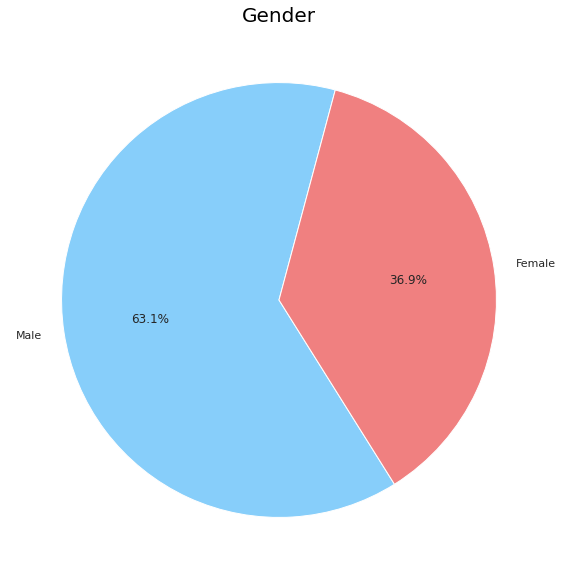

In [8]:
labels = 'Male', 'Female'
df['gender'].value_counts().plot.pie(labels=labels, colors=['lightskyblue', 'lightcoral'] , figsize=(10, 10), autopct='%1.1f%%', startangle=75)
plt.title('Gender',color='black', fontsize=20)
plt.axis('off')
plt.show()

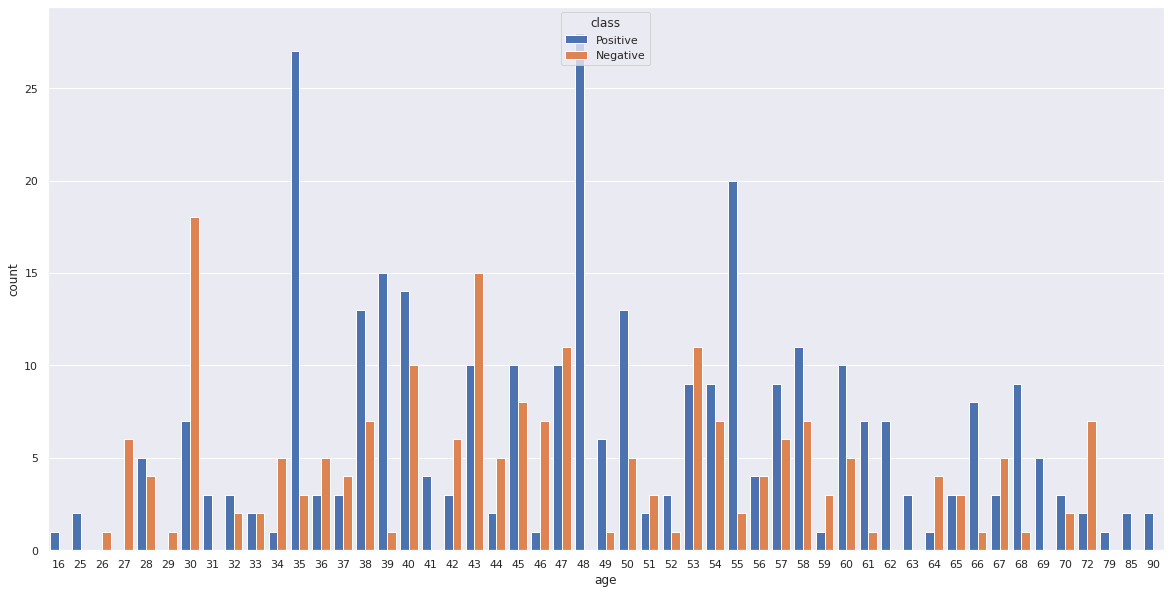

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(data = df, x='age', hue='class', saturation=1)

<Figure size 864x504 with 0 Axes>

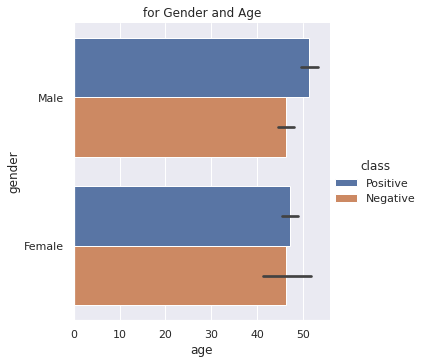

In [10]:
plt.figure(figsize=(12,7))
sns.catplot(y="gender", x="age",
                 hue='class',
                 data=df, kind="bar")
plt.title('for Gender and Age')
plt.show()

In [12]:
categorical_features   = df.nunique()[df.nunique() < 3].keys().tolist()

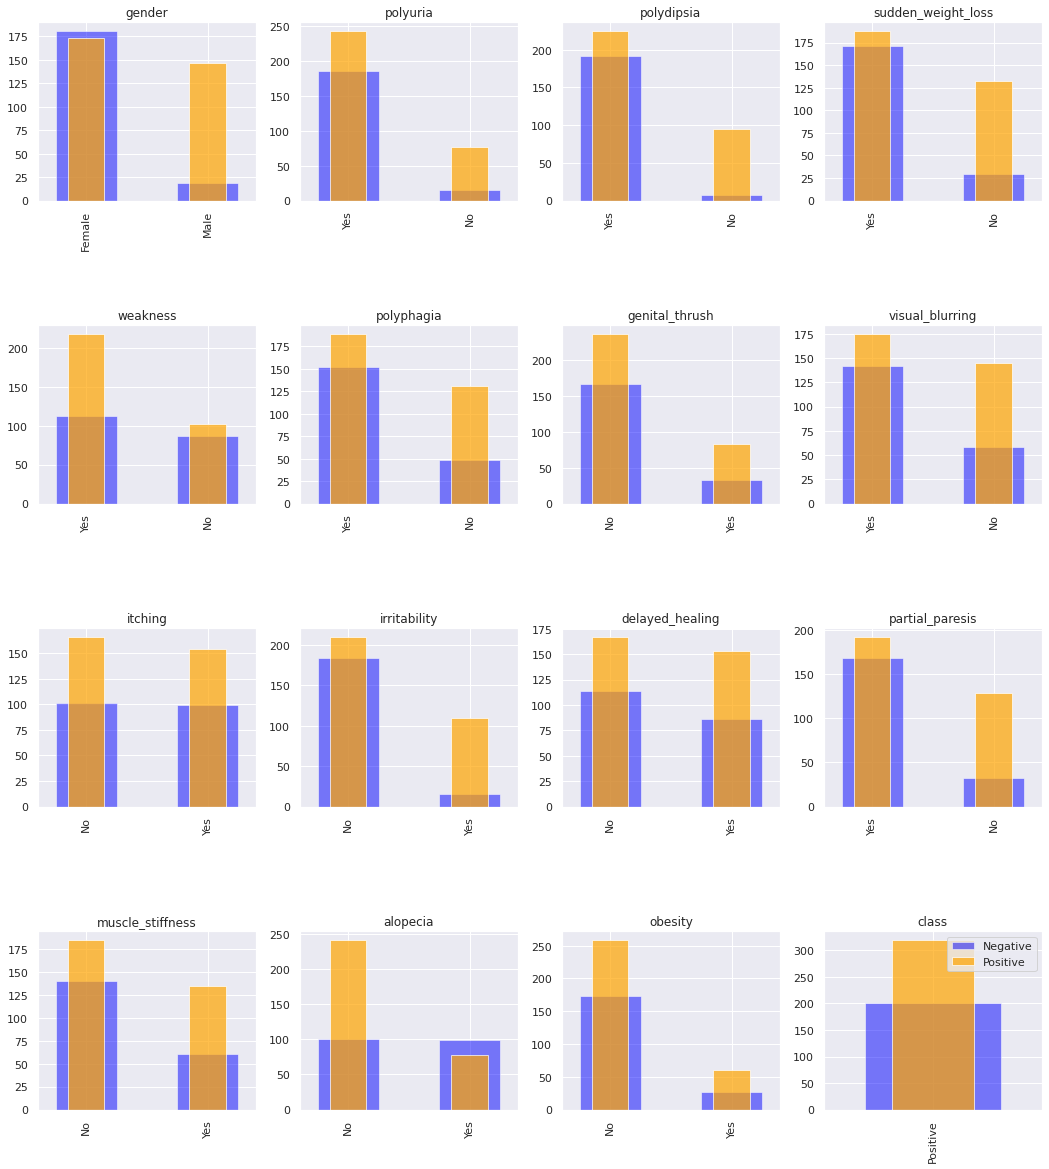

In [13]:
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 20))
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[df['class'] == 'Negative'][categorical_feature].value_counts().plot.bar(width=.5, ax=ax[row, col], color='blue', alpha=0.5).set_title(categorical_feature)
    df[df['class'] == 'Positive'][categorical_feature].value_counts().plot.bar(width=.3, ax=ax[row, col], color='orange', alpha=0.7).set_title(categorical_feature)
    plt.legend(['Negative', 'Positive'])
    fig.subplots_adjust(hspace=0.7)

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [15]:
data = df.copy()

encoders = LabelEncoder()
for i in categorical_features :
    data[i] = encoders.fit_transform(data[i])
data.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


<Figure size 1296x1440 with 0 Axes>

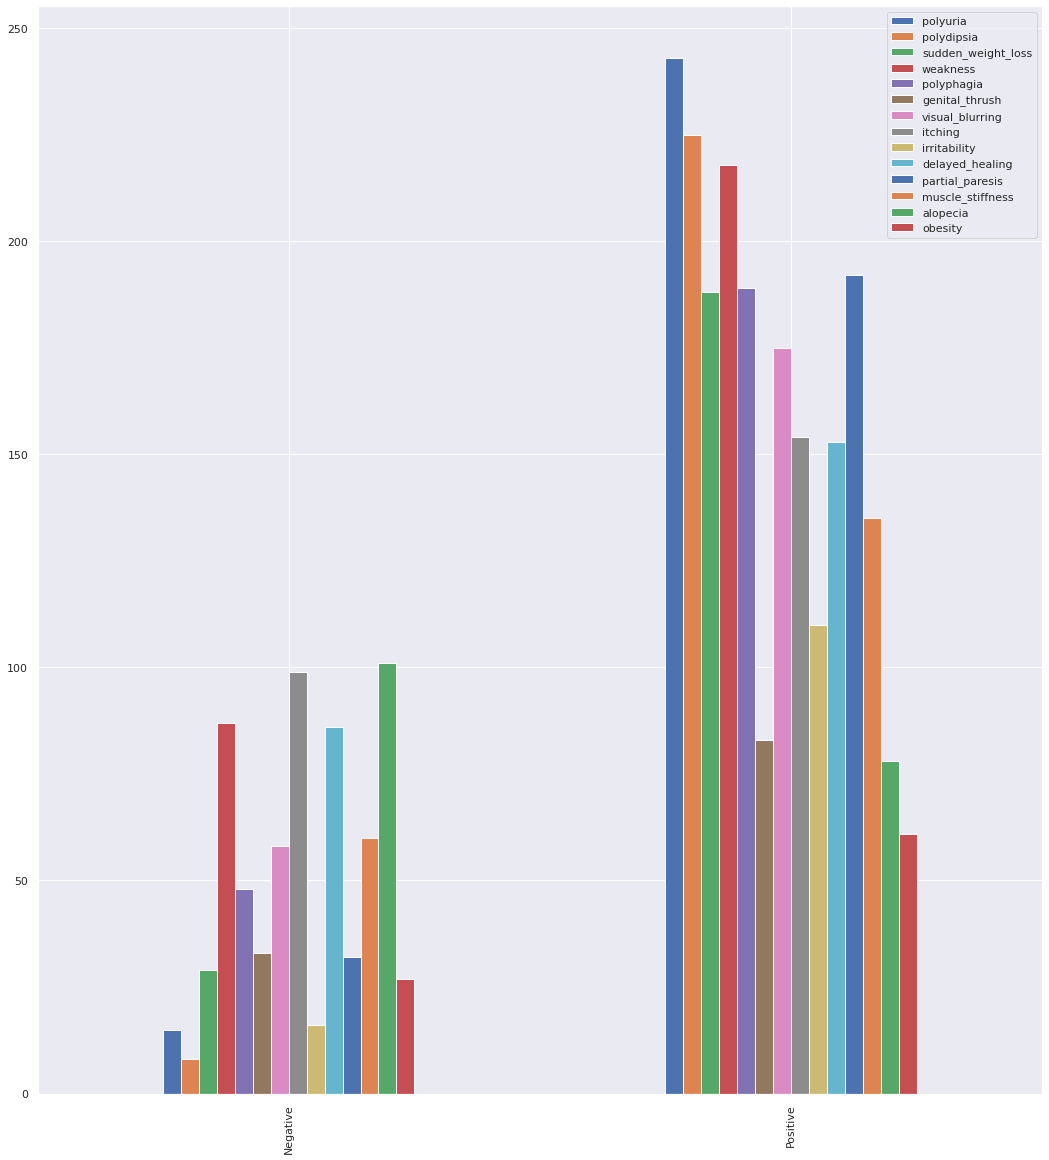

<Figure size 1296x1440 with 0 Axes>

In [16]:
not_symptom =  ['age', 'gender']
symptom_name = [f for f in data.columns if f not in not_symptom]  
count_class = data[symptom_name].groupby('class').aggregate(sum)
count_class.index = ['Negative', 'Positive']
count_class.plot(kind='bar')
plt.figure(figsize=(18, 20))

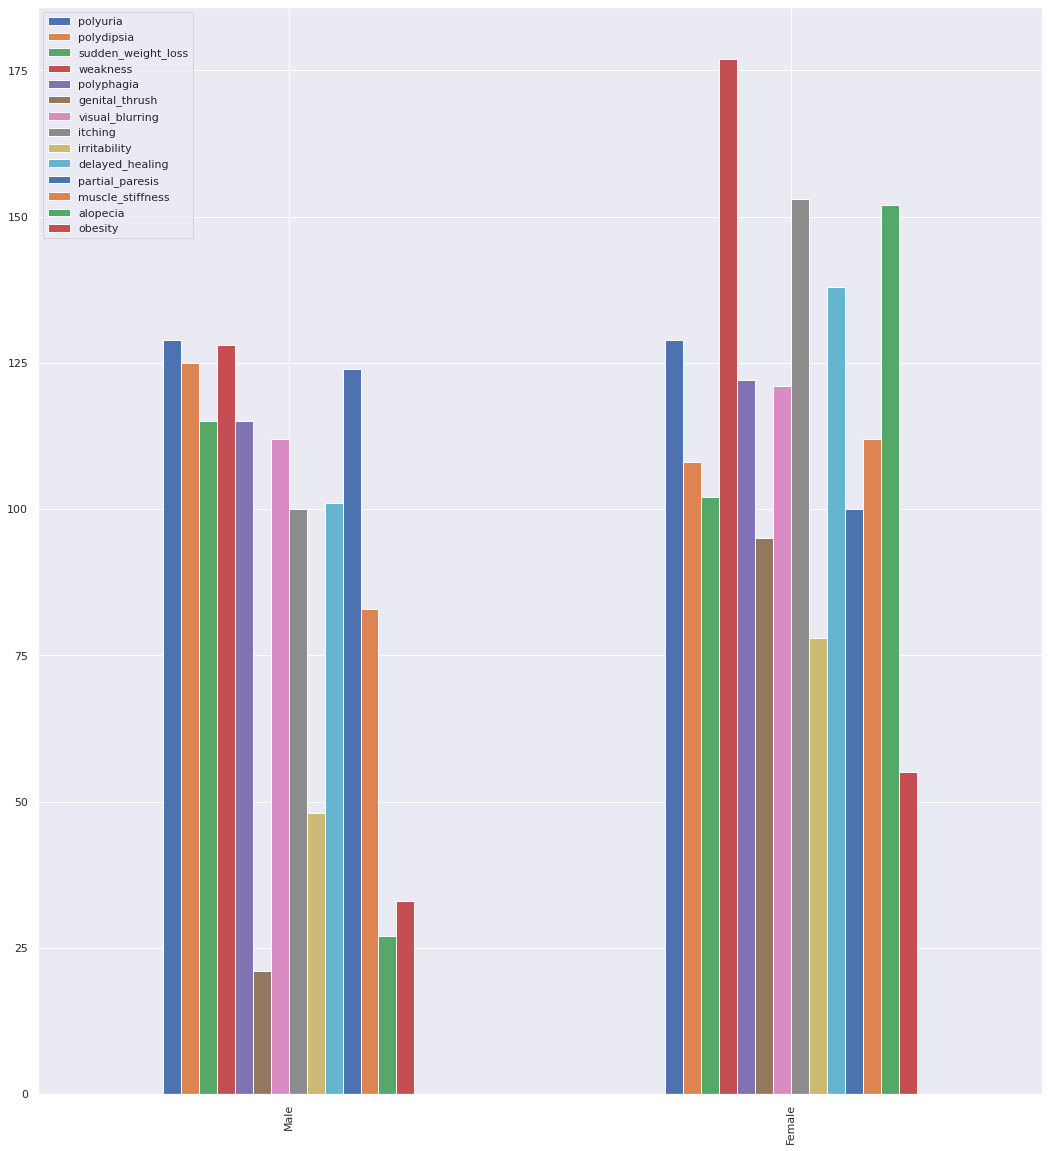

In [17]:
not_symptom =  ['age', 'class']
symptom_name = [f for f in data.columns if f not in not_symptom]  
count_class = data[symptom_name].groupby('gender').aggregate(sum)
count_class.index = ['Male', 'Female']
count_class.plot(kind='bar')

In [18]:
data.describe()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
X = data.drop(['class'], axis=1)
y = data['class']

In [20]:
X.shape, y.shape

((520, 16), (520,))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [22]:
print (X_train.shape, X_test.shape)
print (y_train.shape, y_test.shape)

(364, 16) (156, 16)
(364,) (156,)


In [23]:
normalizer = StandardScaler()

In [24]:
param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty':['l1','l2']}

In [25]:
model = GridSearchCV(LogisticRegression(), param_grid, cv=3)

In [26]:
pipe_log = make_pipeline(normalizer, model)

In [27]:
pipe_log.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('gridsearchcv',
                 GridSearchCV(cv=3, error_score=nan,
                              estimator=LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                    

In [28]:
y_pred = pipe_log.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve

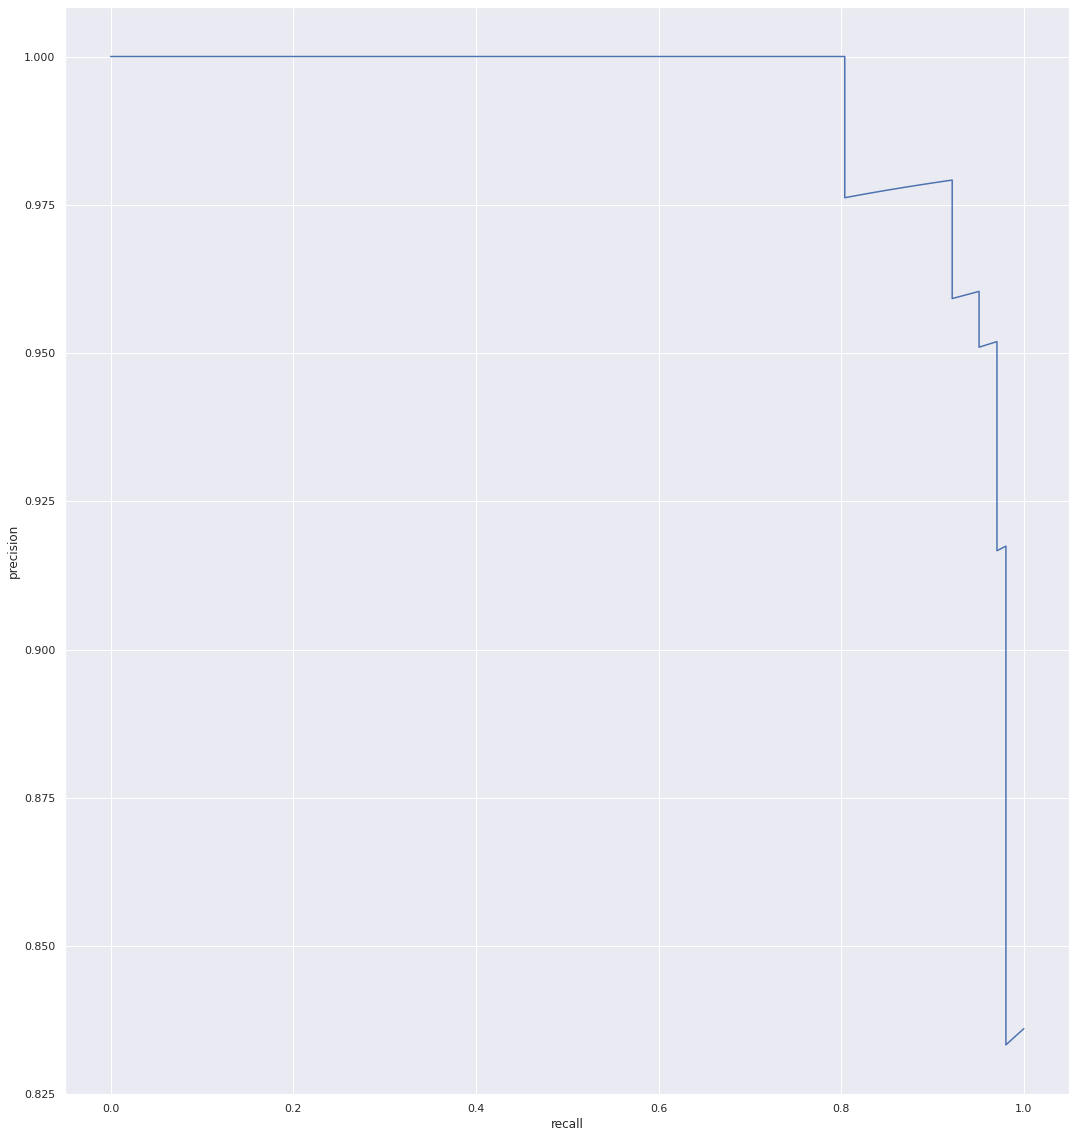

In [31]:
precision, recall, thresholds = precision_recall_curve(y_test, pipe_log.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

In [32]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        54
           1       0.95      0.95      0.95       102

    accuracy                           0.94       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156

[[49  5]
 [ 5 97]]


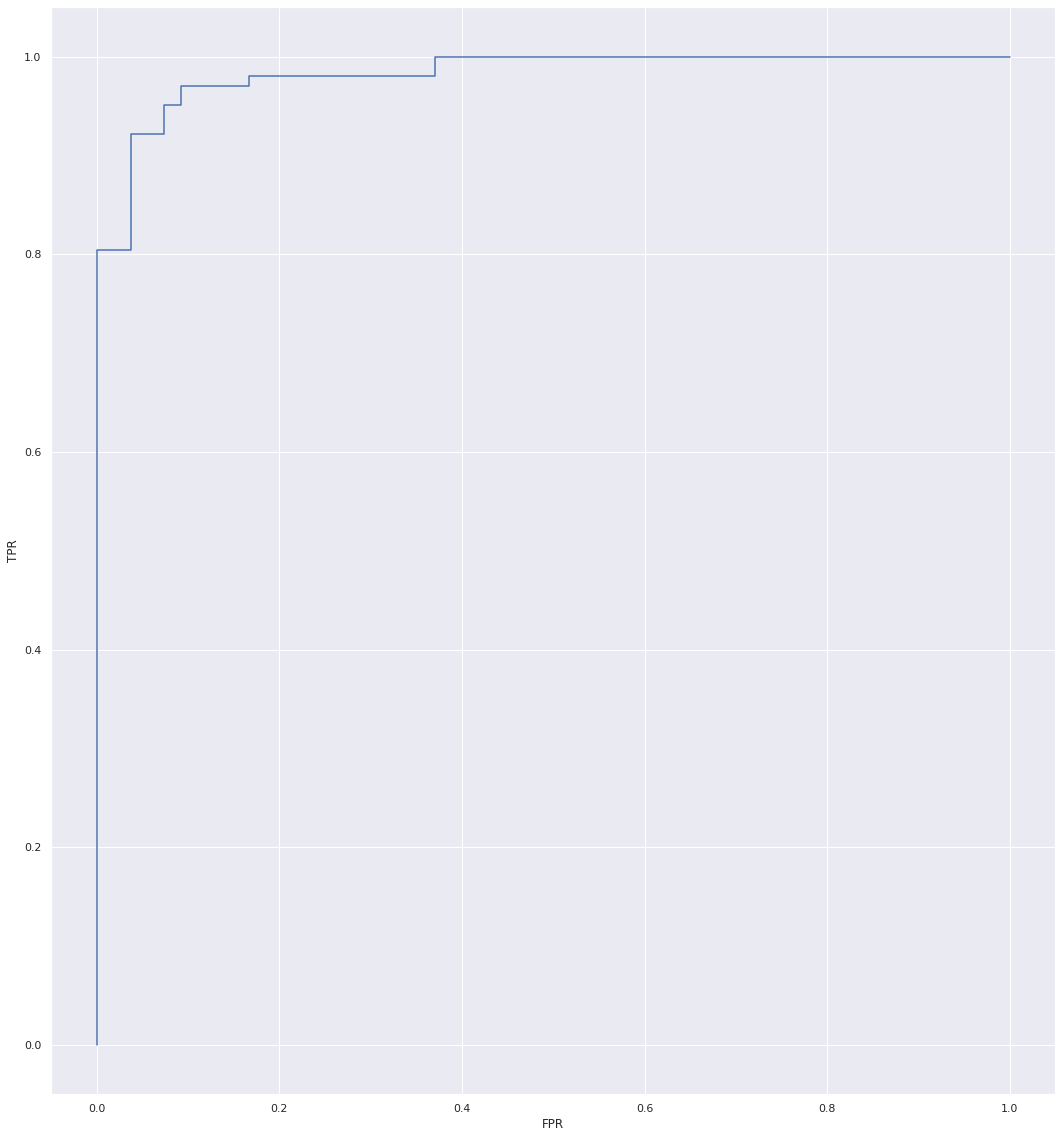

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, pipe_log.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()